# **Imports**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#libraries for models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# **Read Data**

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# **Data Exploration**

In [3]:
train.head()

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995


In [5]:
print(train.shape)

(290129, 20)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

In [7]:
train.describe()

,Unnamed: 0,id,year,odometer,lat,long,price
count,290129.000000,2.901290e+05,290129.000000,2.901290e+05,285726.000000,285726.000000,2.901290e+05
mean,207301.718108,7.311503e+09,2011.359082,9.764241e+04,38.505649,-94.616042,5.193300e+04
std,119595.649164,4.378450e+06,9.149422,2.058970e+05,5.830007,18.319158,9.591680e+06
min,0.000000,7.301583e+09,1900.000000,0.000000e+00,-84.122245,-159.827728,0.000000e+00
25%,103622.000000,7.308154e+09,2008.000000,3.800000e+04,34.600000,-111.924900,5.991000e+03
50%,207440.000000,7.312664e+09,2014.000000,8.561500e+04,39.170000,-88.212494,1.399000e+04
75%,310804.000000,7.315255e+09,2017.000000,1.334360e+05,42.408400,-80.830000,2.650000e+04
max,414469.000000,7.317101e+09,2022.000000,1.000000e+07,82.252826,173.885502,3.736929e+09


# **Data Cleaning**

## 1. Drop Irrelevant features

In [8]:
train = train.drop(columns = ['Unnamed: 0', 'id', 'size', 'state', 'lat', 'long', 'posting_date'])
test_id=test['id']
test = test.drop(columns = ['Unnamed: 0', 'id', 'size', 'state', 'lat', 'long', 'posting_date'])

year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
type             62596
paint_color      87113
price                0
dtype: int64


<Axes: >

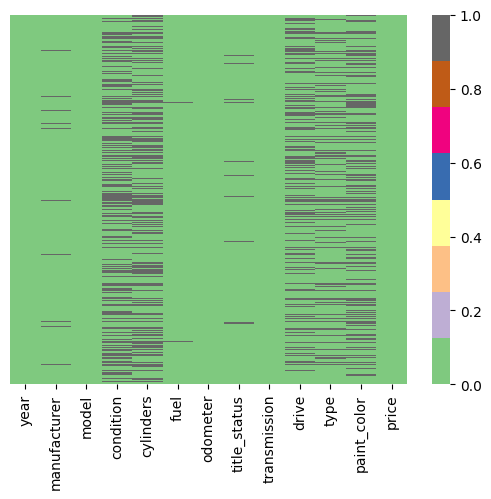

In [9]:
print(train.isnull().sum())

# heatmap to identify nulll values using graph
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='Accent')

## 2. Remove the Outliers

In [10]:
train.shape

(290129, 13)

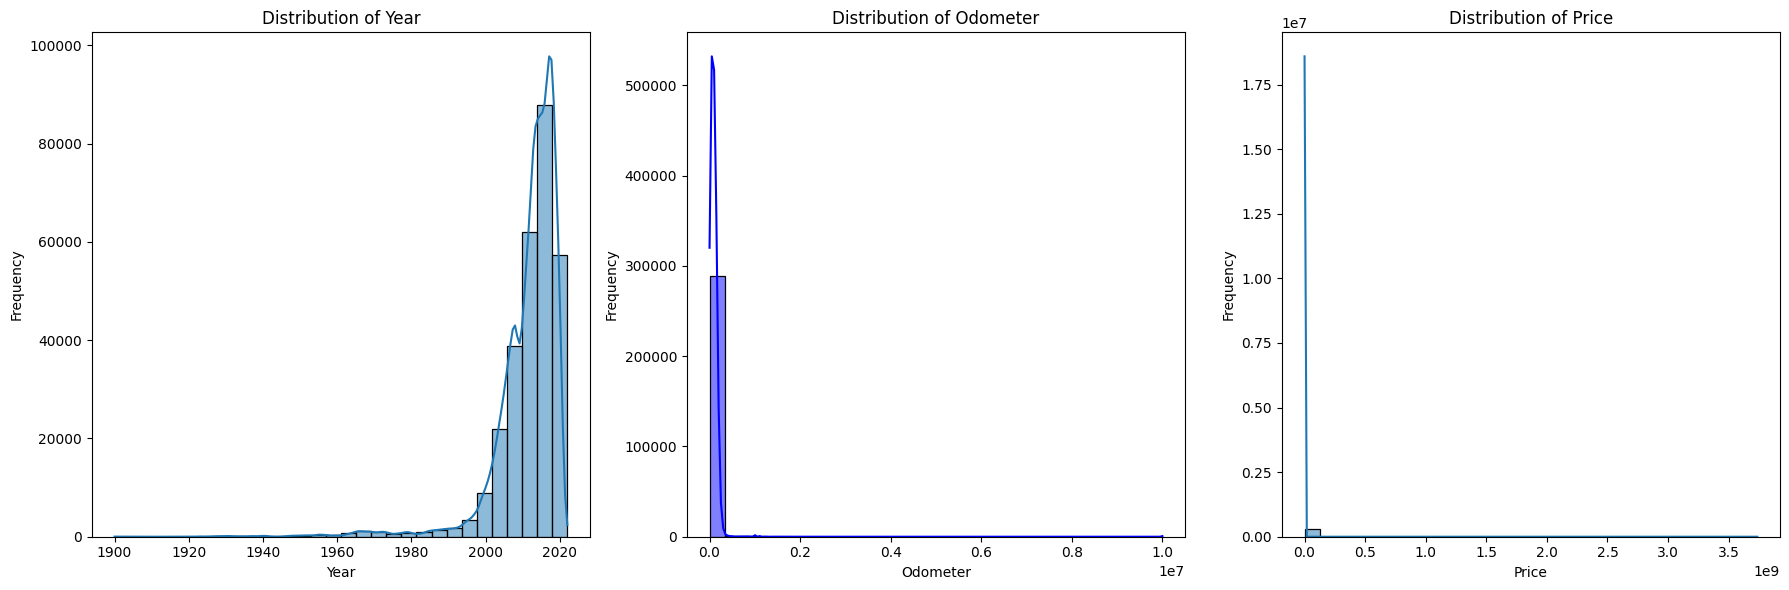

In [11]:
plt.figure(figsize=(18, 6))

# Subplot 1: Distribution plot for 'year'
plt.subplot(1, 3, 1)
sns.histplot(data=train, x='year', kde=True, bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')

# Subplot 2: Distribution plot for 'odometer'
plt.subplot(1, 3, 2)
sns.histplot(train['odometer'], bins=30, kde=True, color='blue')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Distribution of Odometer')

# Subplot 3: Distribution plot for 'price'
plt.subplot(1, 3, 3)
sns.histplot(data=train, x='price', kde=True, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()

In [12]:
print('Skewness for year:', train['year'].skew())
print('Skewness for odometer:', train['odometer'].skew())
print('Skewness for price:', train['price'].skew())

Skewness for year: -3.5095804906531294
Skewness for odometer: 38.98681991224003
Skewness for price: 330.26239563597807


In [13]:
# Log transformation on 'year' and 'odometer' columns
train['year_log'] = np.log(train['year'])

# Handling zero and negative values
train['odometer'] = train['odometer'].apply(lambda x: max(x, 1))  # Replace negative values with 1
train['odometer_log'] = np.log(train['odometer'])

# For 'price': Remove zero prices and drop rows with missing price values.
# Zero prices are likely incorrect, and missing prices are not useful for analysis.
train['price'] = train['price'].replace(0, np.NaN)
train.dropna(subset=['price'], inplace=True)
train['price_log'] = np.log(train['price'])

In [14]:
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (lower_bound, upper_bound)

#removing outliers
columns=np.array(['year_log', 'odometer_log', 'price_log'])

for col in columns:
    o1, o2 = outliers(train, col)
    train = train[(train[col] >= o1) & (train[col] <= o2)]
    print('IQR of', col, '=', o1, o2)

IQR of year_log = 7.598186395097732 7.6160746236681
IQR of odometer_log = 8.661156071998306 13.713643293078576
IQR of price_log = 6.9975321314149905 12.126931829394826


In [15]:
train = train.drop(columns = ['year_log', 'odometer_log', 'price_log'])
train.shape

(239443, 13)

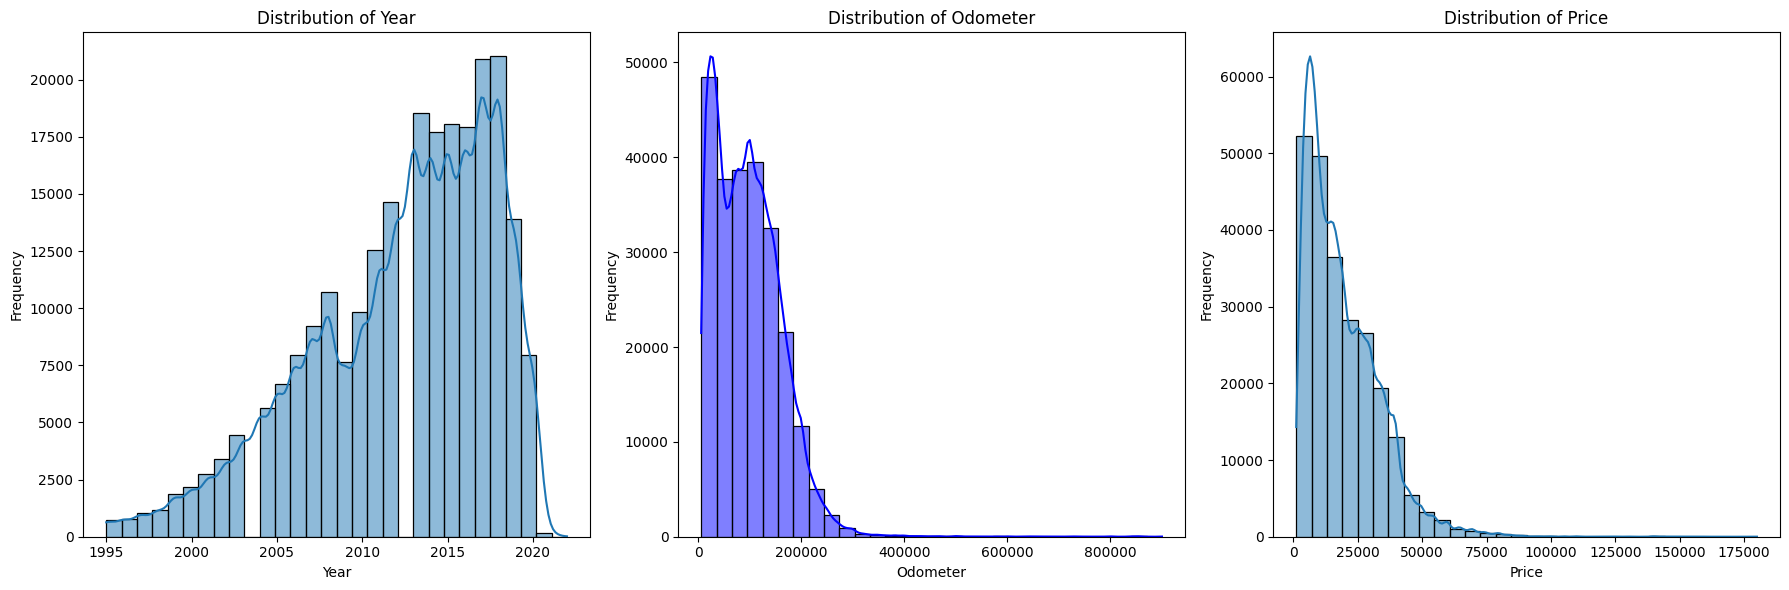

In [16]:
plt.figure(figsize=(18, 6))

# Subplot 1: Distribution plot for 'year'
plt.subplot(1, 3, 1)
sns.histplot(data=train, x='year', kde=True, bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')

# Subplot 2: Distribution plot for 'odometer'
plt.subplot(1, 3, 2)
sns.histplot(train['odometer'], bins=30, kde=True, color='blue')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Distribution of Odometer')

# Subplot 3: Distribution plot for 'price'
plt.subplot(1, 3, 3)
sns.histplot(data=train, x='price', kde=True, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()

In [17]:
train['year'].describe()

count    239443.000000
mean       2012.326537
std           5.418127
min        1995.000000
25%        2009.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

In [18]:
train['odometer'].describe()

count    239443.000000
mean      97329.089044
std       64992.459816
min        5778.000000
25%       43182.000000
50%       91644.000000
75%      138248.500000
max      900132.000000
Name: odometer, dtype: float64

In [19]:
train['price'].describe()

count    239443.000000
mean      19221.335875
std       14160.056539
min        1095.000000
25%        7995.000000
50%       15990.000000
75%       27700.000000
max      180000.000000
Name: price, dtype: float64

## 3. Handling categorical missing data

Handling missing For Train set

In [20]:
# manufacturer column
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train['manufacturer'] = imputer.fit_transform(train[['manufacturer']].values.reshape(-1, 1))
train['fuel'] = imputer.fit_transform(train[['fuel']].values.reshape(-1, 1))

In [21]:
# cylinders column
model_cylinders_map = train.dropna(subset=['cylinders']).groupby('model')['cylinders'].apply(lambda x: x.mode().iloc[0])

def fill_cylinders(row):
    if pd.isnull(row['cylinders']):
        return model_cylinders_map.get(row['model'], None)
    else:
        return row['cylinders']

# Apply the fill_cylinders function to fill missing 'cylinders' values
train['cylinders'] = train.apply(lambda row: fill_cylinders(row), axis=1)

# Fill remaining NaN values in 'cylinders' with the mode of the entire 'cylinders' column
cylinders_mode = train['cylinders'].mode().iloc[0]
train['cylinders'].fillna(cylinders_mode, inplace=True)

In [22]:
# condition column
mean_odometer_by_condition = train.groupby('condition')['odometer'].mean()

# Function to fill missing 'condition' values based on the mean odometer values
def fill_condition(row):
    if pd.isnull(row['condition']):
        min_diff = float('inf')  # Initialize the minimum difference to infinity
        nearest_condition = None

        # Loop through each 'condition' and find the nearest one with the smallest difference in odometer values
        for condition, avg_odometer in mean_odometer_by_condition.items():
            diff = abs(avg_odometer - row['odometer'])
            if diff < min_diff:
                min_diff = diff
                nearest_condition = condition

        return nearest_condition
    else:
        return row['condition']

# Apply the fill_condition function to fill missing 'condition' values
train['condition'] = train.apply(lambda row: fill_condition(row), axis=1)

In [23]:
# title_status column

def fill_title_status(row):
    if row["condition"] in ["excellent", "new", "like new", "good"]:
        return "clean"
    else:
        return row["title_status"]
train["title_status"] = train.apply(fill_title_status, axis=1)

# Fill remaining NaN values in 'cylinders' with the mode of the entire 'cylinders' column
cylinders_mode = train['title_status'].mode().iloc[0]
train['title_status'].fillna(cylinders_mode, inplace=True)

In [24]:
# drive column
model_drive_map = train.dropna(subset=['drive']).groupby('model')['drive'].apply(lambda x: x.mode().iloc[0])

# Function to fill missing 'drive' values based on the most frequent 'drive' value for the 'model'
def fill_drive(row):
    if pd.isnull(row['drive']):
        return model_drive_map.get(row['model'], None)
    else:
        return row['drive']

# Apply the fill_drive function to fill missing 'drive' values
train['drive'] = train.apply(lambda row: fill_drive(row), axis=1)

# Fill remaining NaN values in 'drive' with the mode of the entire 'drive' column
drive_mode = train['drive'].mode().iloc[0]
train['drive'].fillna(drive_mode, inplace=True)

In [25]:
# type column
model_type_map = train.dropna(subset=['type']).groupby('model')['type'].apply(lambda x: x.mode().iloc[0])

# Function to fill missing 'type' values based on the most frequent 'type' value for the 'model'
def fill_type(row):
    if pd.isnull(row['type']):
        return model_type_map.get(row['model'], None)
    else:
        return row['type']

# Apply the fill_type function to fill missing 'type' values
train['type'] = train.apply(lambda row: fill_type(row), axis=1)

# Fill remaining NaN values in 'type' with the mode of the entire 'type' column
type_mode = train['type'].mode().iloc[0]
train['type'].fillna(type_mode, inplace=True)

In [26]:
# paint_color column

# Fill remaining NaN values in 'type' with the mode of the entire 'type' column
type_mode = train['paint_color'].mode().iloc[0]
train['paint_color'].fillna(type_mode, inplace=True)

In [27]:
train.isnull().sum()

year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
price           0
dtype: int64

Handling missing For Test set

In [28]:
# manufacturer column
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test['manufacturer'] = imputer.fit_transform(test[['manufacturer']].values.reshape(-1, 1))
test['fuel'] = imputer.fit_transform(test[['fuel']].values.reshape(-1, 1))

In [29]:
# condition column
test['condition'] = test.apply(lambda row: fill_condition(row), axis=1)

# cylinders column
test['cylinders'] = test.apply(lambda row: fill_cylinders(row), axis=1)
cylinders_mode = test['cylinders'].mode().iloc[0]
test['cylinders'].fillna(cylinders_mode, inplace=True)

# title_status column
test["title_status"] = test.apply(fill_title_status, axis=1)
cylinders_mode = test['title_status'].mode().iloc[0]
test['title_status'].fillna(cylinders_mode, inplace=True)

# drive column
test['drive'] = test.apply(lambda row: fill_drive(row), axis=1)
drive_mode = test['drive'].mode().iloc[0]
test['drive'].fillna(drive_mode, inplace=True)

# type column
test['type'] = test.apply(lambda row: fill_type(row), axis=1)
type_mode = test['type'].mode().iloc[0]
test['type'].fillna(type_mode, inplace=True)

# paint_color column
test['paint_color'].ffill(inplace=True)
color = test['paint_color'].mode().iloc[0]
test['paint_color'].fillna(color, inplace=True)

In [30]:
test.isnull().sum()

year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

# **Data Pre-processing**

**Label Encoding**

In [31]:
# Label Encoding
encode=preprocessing.LabelEncoder()
train=train.apply(encode.fit_transform)

# For Test set
encode_test=preprocessing.LabelEncoder()
test=test.apply(encode_test.fit_transform)

**Scaling Dataset (Optional)**


In [32]:
# # Standard Scaling
# norm = StandardScaler()
# train['odometer'] = norm.fit_transform(np.array(train['odometer']).reshape(-1,1))
# train['year'] = norm.fit_transform(np.array(train['year']).reshape(-1,1))
# train['model'] = norm.fit_transform(np.array(train['model']).reshape(-1,1))

# # For Test set
# norm_test = StandardScaler()
# test['odometer'] = norm_test.fit_transform(np.array(test['odometer']).reshape(-1,1))
# test['year'] = norm_test.fit_transform(np.array(test['year']).reshape(-1,1))
# test['model'] = norm_test.fit_transform(np.array(test['model']).reshape(-1,1))

# **Modeling**

In [33]:
X= train.drop('price',axis=1)
y= train.price

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)

(191554, 12) (191554,)
(47889, 12) (47889,)


**Random Forest**

In [34]:
random_forest = RandomForestRegressor(n_estimators=150, random_state=13)
random_forest.fit(X_train, y_train)

y_pred_train_rf = random_forest.predict(X_train)
y_pred_val_rf = random_forest.predict(X_val)


r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_val_rf = r2_score(y_val, y_pred_val_rf)

print("R2 Score for Training Data:", r2_train_rf)
print("R2 Score for Validation Data:", r2_val_rf)
print()

# Calculate RMSE  for training and validation data
rmse_train_rf = round(np.sqrt(mean_squared_error(y_train, y_pred_train_rf)), 2)
rmse_val_rf = round(np.sqrt(mean_squared_error(y_val, y_pred_val_rf)), 2)

print('Root Mean Squared Error for Training Data:', rmse_train_rf)
print('Root Mean Squared Error for Validation Data:', rmse_val_rf)

R2 Score for Training Data: 0.9912486882328689
R2 Score for Validation Data: 0.9375055947397422

Root Mean Squared Error for Training Data: 318.78
Root Mean Squared Error for Validation Data: 852.5


In [35]:
predictions_rf = random_forest.predict(test)

predictions_df = pd.DataFrame({'id': test_id, 'Target': predictions_rf})
predictions_df.to_csv('submission.csv', index=False)

**Adaboost**

In [36]:
adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=25),
    n_estimators=100, learning_rate=0.1
)

adaboost.fit(X_train, y_train)

# Make predictions on the training data and validation data
y_pred_train_ab = adaboost.predict(X_train)
y_pred_val_ab = adaboost.predict(X_val)

# Calculate R2 score for training and validation data
r2_train_ab = r2_score(y_train, y_pred_train_ab)
r2_val_ab = r2_score(y_val, y_pred_val_ab)

# Print the R2 score values for training and testing data
print("R2 Score for Training Data:", r2_train_ab)
print("R2 Score for Validation Data:", r2_val_ab)
print()

# Calculate RMSE  for training and validation data
rmse_train_ab = round(np.sqrt(mean_squared_error(y_train, y_pred_train_ab)), 2)
rmse_val_ab = round(np.sqrt(mean_squared_error(y_val, y_pred_val_ab)), 2)

print('Root Mean Squared Error for Training Data:', rmse_train_ab)
print('Root Mean Squared Error for Validation Data:', rmse_val_ab)

R2 Score for Training Data: 0.999426372092558
R2 Score for Validation Data: 0.9356053672837491

Root Mean Squared Error for Training Data: 81.61
Root Mean Squared Error for Validation Data: 865.36


XGBOOST

In [37]:
xgboost = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 25, n_estimators = 100)

xgboost.fit(X_train, y_train)

# Make predictions on the training data and validation data
y_pred_train_xgb = xgboost.predict(X_train)
y_pred_val_xgb = xgboost.predict(X_val)

# Calculate R2 score for training and validation data
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_val_xgb = r2_score(y_val, y_pred_val_xgb)

# Print the R2 score values for training and testing data
print("R2 Score for Training Data:", r2_train_xgb)
print("R2 Score for Testing Data:", r2_val_xgb)
print()

# Calculate RMSE  for training and validation data
rmse_train_xgb = round(np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)), 2)
rmse_val_xgb = round(np.sqrt(mean_squared_error(y_val, y_pred_val_xgb)), 2)

print('Root Mean Squared Error for Training Data:', rmse_train_xgb)
print('Root Mean Squared Error for Validation Data:', rmse_val_xgb)

R2 Score for Training Data: 0.9887958216630478
R2 Score for Testing Data: 0.9358323459408694

Root Mean Squared Error for Training Data: 360.7
Root Mean Squared Error for Validation Data: 863.84


KNN

In [38]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)

# Make predictions on the training data validation data
y_pred_train_knn = knn.predict(X_train)
y_pred_val_knn = knn.predict(X_val)

# Calculate R2 score for training and validation data
r2_train_knn = r2_score(y_train, y_pred_train_knn)
r2_val_knn = r2_score(y_val, y_pred_val_knn)

# Print the R2 score values for training and testing data
print("R2 Score for Training Data:", r2_train_knn)
print("R2 Score for Validation Data:", r2_val_knn)
print()

# Calculate RMSE  for training and validation data
rmse_train_knn = round(np.sqrt(mean_squared_error(y_train, y_pred_train_knn)), 2)
rmse_val_knn = round(np.sqrt(mean_squared_error(y_val, y_pred_val_knn)), 2)

print('Root Mean Squared Error for Training Data:', rmse_train_knn)
print('Root Mean Squared Error for Validation Data:', rmse_val_knn)

R2 Score for Training Data: 0.8863809155762966
R2 Score for Validation Data: 0.7448788808307876

Root Mean Squared Error for Training Data: 1148.62
Root Mean Squared Error for Validation Data: 1722.45


## R2 Score Comparison for Different Models

TRAINING

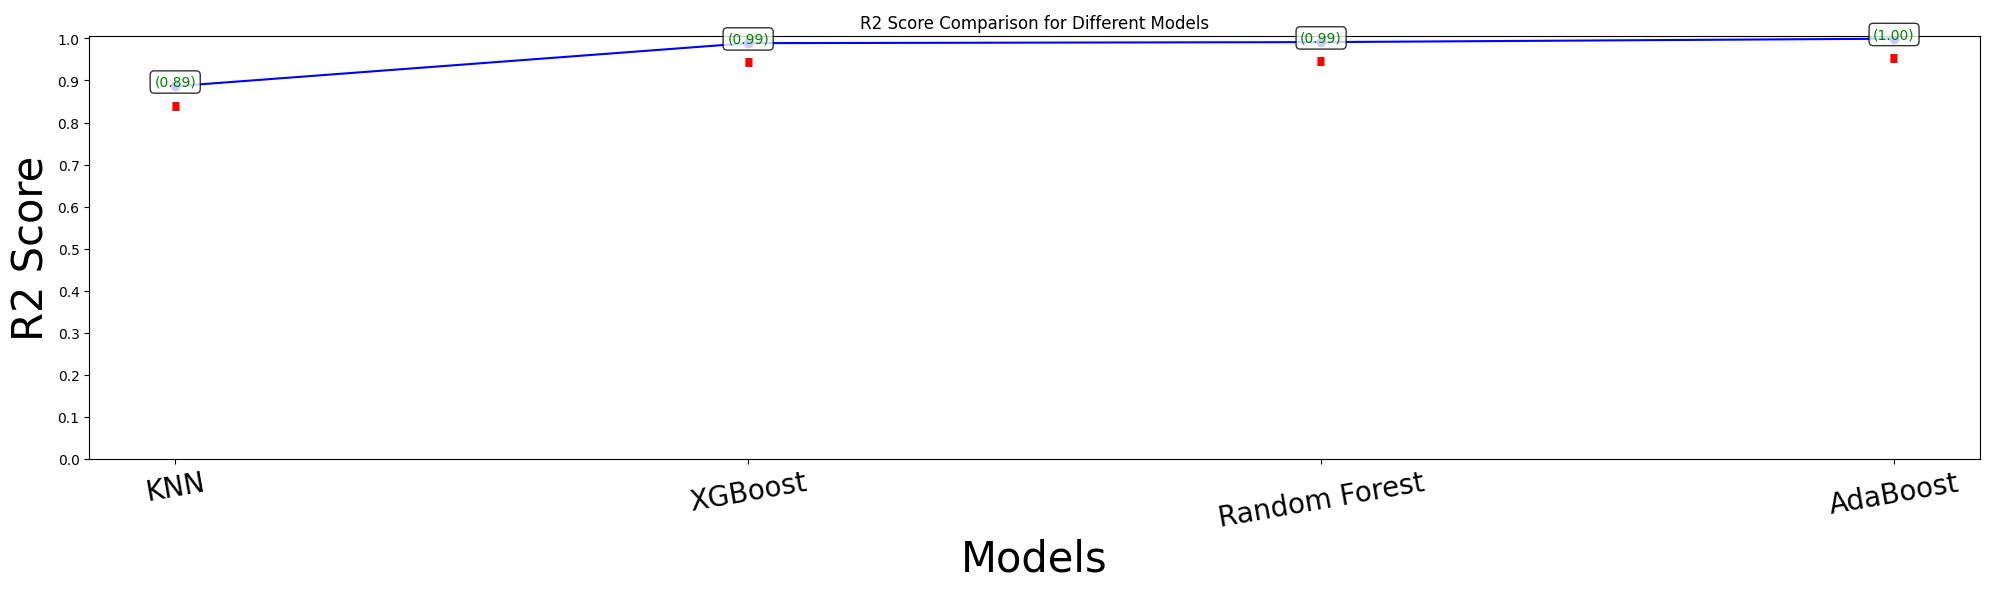

In [39]:
# Sort the models and their R2 scores in descending order
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'KNN']
r2_scores = [r2_train_rf, r2_train_ab, r2_train_xgb, r2_train_knn]
sorted_models, sorted_r2_scores = zip(*sorted(zip(models, r2_scores), key=lambda x: x[1], reverse=False))

# Create custom y ticks
y_ticks = list(np.arange(0, 1.1, 0.1))

plt.figure(figsize=(20, 6))
plt.plot(sorted_models, sorted_r2_scores, marker='o', linestyle='-', color='blue')
plt.yticks(y_ticks)
plt.xticks(range(len(sorted_models)), sorted_models, fontsize=20, rotation=10)


plt.xlabel("Models", fontsize=30)
plt.ylabel("R2 Score", fontsize=30)
plt.title("R2 Score Comparison for Different Models")

# Add text annotations for R2 scores and red dots
for a, b in enumerate(sorted_r2_scores):
    val = f"({b:.2f})"
    plt.text(a, b + 0.01, val, horizontalalignment='center', verticalalignment='center', color='green', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.text(a, b - 0.01, '.', horizontalalignment='center', verticalalignment='center', color='red', fontsize=50)

plt.tight_layout()
# plt.savefig('Results/R2-Score-Comparison_train.jpg', dpi=600)
plt.show()

VALIDATION

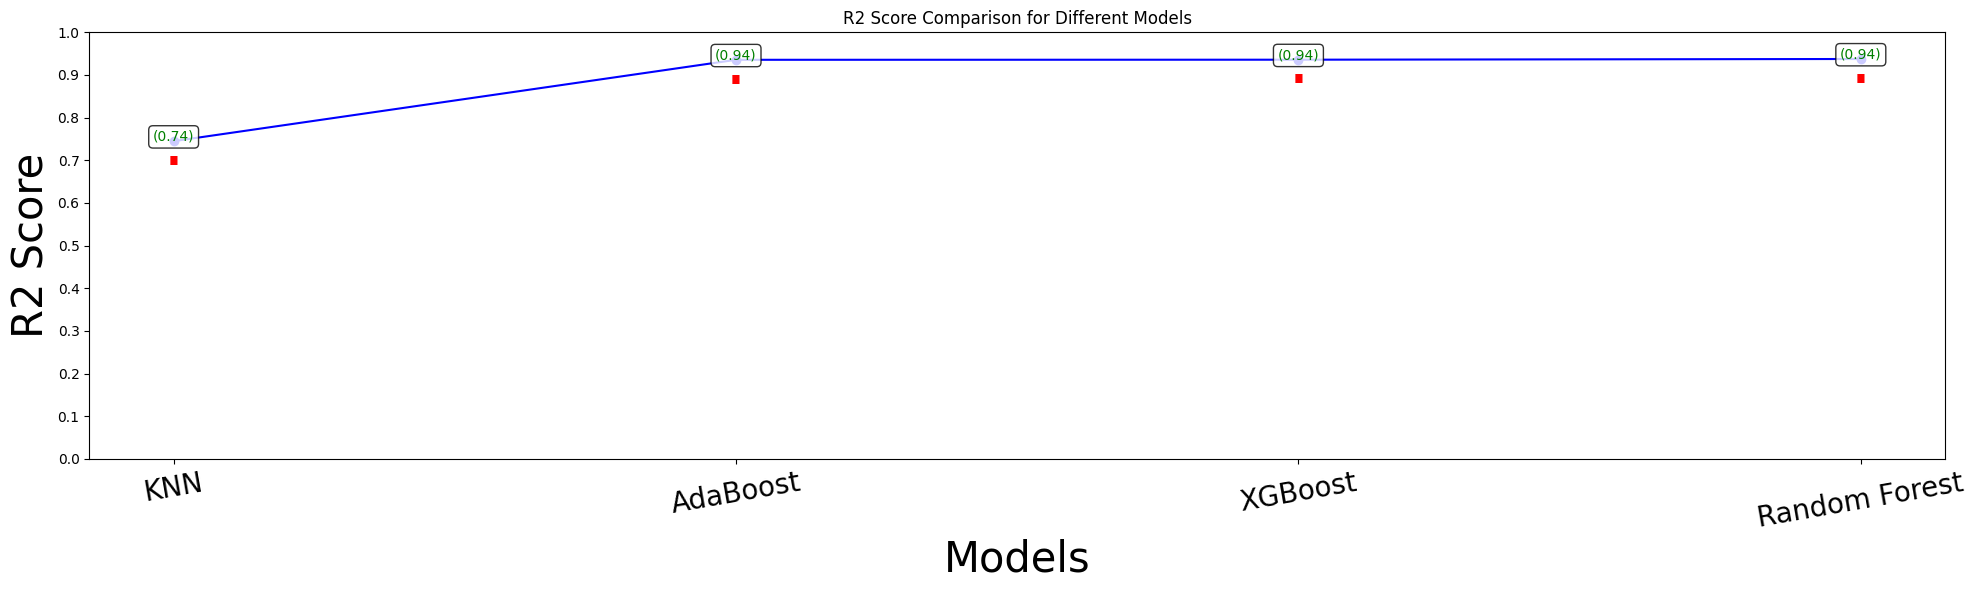

In [40]:
# Sort the models and their R2 scores in descending order
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'KNN']
r2_scores = [r2_val_rf, r2_val_ab, r2_val_xgb, r2_val_knn]
sorted_models, sorted_r2_scores = zip(*sorted(zip(models, r2_scores), key=lambda x: x[1], reverse=False))

# Create custom y ticks
y_ticks = list(np.arange(0, 1.1, 0.1))

plt.figure(figsize=(20, 6))
plt.plot(sorted_models, sorted_r2_scores, marker='o', linestyle='-', color='blue')
plt.yticks(y_ticks)
plt.xticks(range(len(sorted_models)), sorted_models, fontsize=20, rotation=10)

# Set the x and y axis labels and title
plt.xlabel("Models", fontsize=30)
plt.ylabel("R2 Score", fontsize=30)
plt.title("R2 Score Comparison for Different Models")

# Add text annotations for R2 scores and red dots
for a, b in enumerate(sorted_r2_scores):
    val = f"({b:.2f})"
    plt.text(a, b + 0.01, val, horizontalalignment='center', verticalalignment='center', color='green', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.text(a, b - 0.01, '.', horizontalalignment='center', verticalalignment='center', color='red', fontsize=50)

# Adjust the layout and save the figure
plt.tight_layout()
# plt.savefig('Results/R2-Score-Comparison_validate.jpg', dpi=600)

# Show the plot
plt.show()